[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIForVet/aiml/blob/main/01-data-sets.ipynb)

# MNIST Dataset

The MINST dataset stands for "Modified National Institute of Standards and Technology". The dataset contains a large collection of handwritten digits that is commonly used for training various image processing systems. The dataset was created by re-mixing samples from NIST's original datasets, which were taken from American Census Bureau employees and high school students. It is designed to help scientists develop and test machine learning algorithms in pattern recognition and machine learning. It contains 60,000 training images and 10,000 testing images, each of which is a grayscale image of size 28x28 pixels.



## Loading MNIST dataset using TensorFlow/Keras

This code snippet load mnist dataset keras example using Keras, retrieves the training images and labels, and then plots four images in a row with their corresponding labels. Each image is displayed in grayscale.

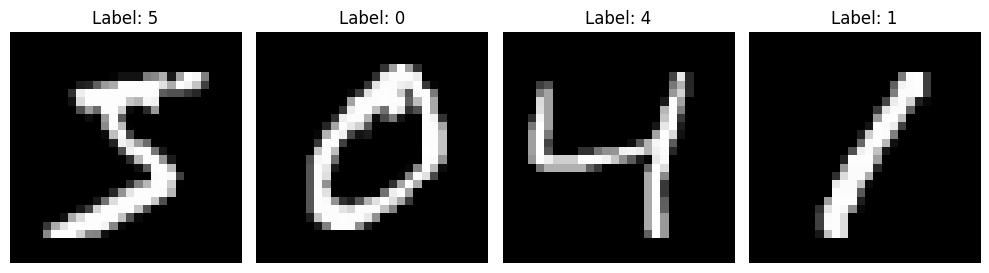

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()
# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Loading MNIST dataset Using PyTorch

In this examples we will explore to load mnist dataset pytorch example. PyTorch offers a similar utility through torchvision.datasets, which is very convenient, especially when combined with torchvision.transforms to perform basic preprocessing like converting images to tensor format.

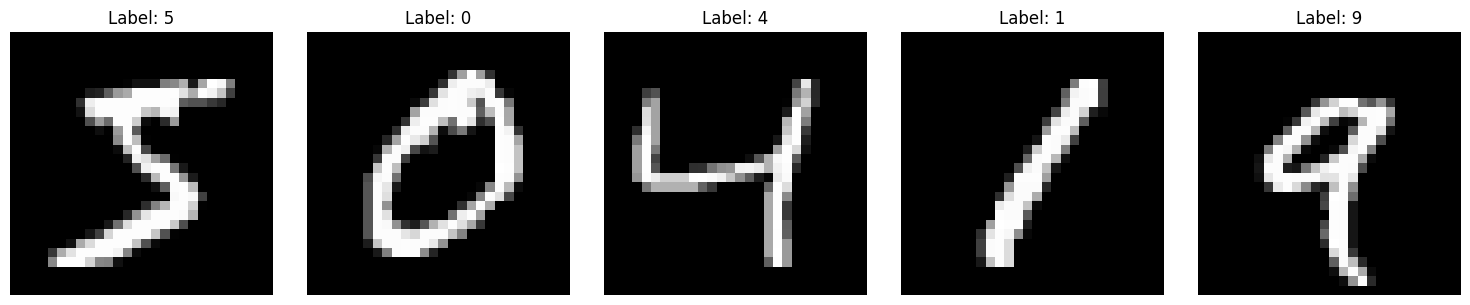

In [2]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
# Define the transformation to convert images to PyTorch tensors
transform = transforms.Compose([transforms.ToTensor()])
# Load the MNIST dataset with the specified transformation
mnist_pytorch = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Create a DataLoader to load the dataset in batches
train_loader_pytorch = torch.utils.data.DataLoader(mnist_pytorch, batch_size=1, shuffle=False)
# Create a figure to display the images
plt.figure(figsize=(15, 3))
# Print the first few images in a row
for i, (image, label) in enumerate(train_loader_pytorch):
    if i < 5:  # Print the first 5 samples
        plt.subplot(1, 5, i + 1)
        plt.imshow(image[0].squeeze(), cmap='gray')
        plt.title(f"Label: {label.item()}")
        plt.axis('off')
    else:
        break  # Exit the loop after printing 5 samples
plt.tight_layout()
plt.show()

# ImageNet

The ImageNet project is a large visual database for visual object recognition software research. The idea for this project was conceived over 15 years ago by AI researcher Fei-Fei Li. The ImageNet team presented their dataset for the first time in 2009.

## Image Recognition in Python Using Tensorflow and Keras

Keras comes bundled with many pre-trained classification models. As of Keras version 2.11, there are 19 different pre-trained models available, where some versions contain many variants as well. The list of models can be found here. Here we will use the following pre-trained models to make predictions on several sample test images. 
- VGG16
- ResNet50
- InceptionV3
AI Image Recognition is the process of using artificial intelligence to identify and categorize objects within an image, a task that, while intuitive for humans, is complex for machines due to the significant processing power required. 

Step 1 – Install and Import Necessary Packages

Instantiate the Model. Here we will use the ResNet50

In [3]:
#%pip install numpy keras tensorflow matplotlib opencv-python
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2 
from keras.applications.resnet50 import ResNet50 
from keras.preprocessing import image 
from keras.applications.resnet50 import preprocess_input, decode_predictions

Then, we’ll load the pre-trained ResNet50 model:

In [4]:
model = ResNet50(weights='imagenet')

Step 2 – Load and Pre-process the Image Using OpenCV

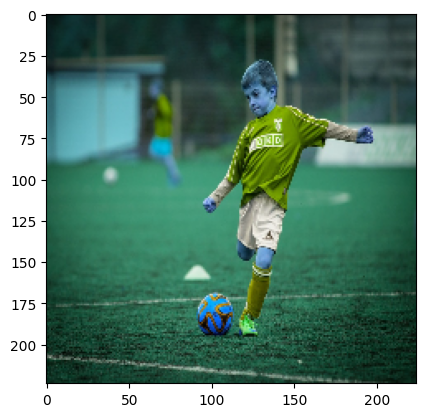

In [14]:
import requests
from io import BytesIO

img_url = "https://cdn.pixabay.com/photo/2015/01/26/22/40/child-613199_960_720.jpg"  # The image to classify
response = requests.get(img_url)
img = None

if response.status_code == 200:
	img_array = np.array(bytearray(response.content), dtype=np.uint8)
	img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)  # Load the image using OpenCV

if img is not None:
	img = cv2.resize(img, (224, 224))  # Resize the image to match the model's input size
	x = image.img_to_array(img)  # Convert the image to a numpy array
	x = np.expand_dims(x, axis=0)  # Add a batch dimension
	x = preprocess_input(x)
	# show the image
	plt.imshow(img)
else:
	print("Error: Image not found or unable to load.")


Step 3 – Make Predictions Using ResNet50.
 Next, we’ll use the pre-trained ResNet50 model to make predictions on the input image

In [15]:
# Make predictions
preds = model.predict(x)

# Decode and display predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted: [('n04254680', 'soccer_ball', np.float32(0.60086733)), ('n02799071', 'baseball', np.float32(0.13570713)), ('n04409515', 'tennis_ball', np.float32(0.07448452))]
